In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("2019.csv")

In [3]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [14]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [15]:
df["Score"].mean(), df["Score"].max(), df["Score"].min()

(5.407096153846155, 7.769, 2.853)

In [41]:
df.columns = ["Rank", "Country", "Score", "GDP", "Social_Support", "Life_Expectancy", "Freedom", "Generosity", "Corruption"]
df.index = df.Country

In [35]:
df.loc[["Germany", "Switzerland", "Austria"]]

,Rank,Country,Score,GDP,Social_Support,Life_Expectancy,Freedom,Gernerosity,Corruption
Country,,,,,,,,,
Germany,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265
Switzerland,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
Austria,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [42]:
df.select_dtypes(include="number").corr()

,Rank,Score,GDP,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption
Rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social_Support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Life_Expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


GPD has the highest impact to the Score

C:\Users\devpo\AppData\Local\Temp\ipykernel_29144\2005901959.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(country, (x[i], y[i]), fontsize=6, alpha=0.7)


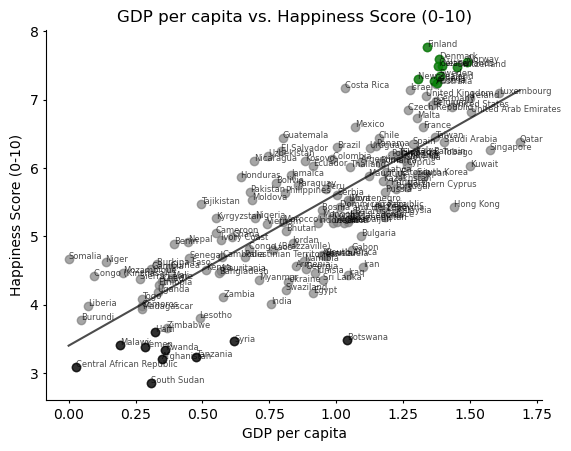

In [ ]:
ax = plt.subplot()

x = df["GDP"]
y = df["Score"]

ax.scatter(x,y, alpha=0.7, color="grey")
ax.scatter(df.head(10)["GDP"],df.head(10)["Score"], alpha=0.7, color="green")
ax.scatter(df.tail(10)["GDP"],df.tail(10)["Score"], alpha=0.7, color="black")


ax.set_ylabel("Happiness Score (0-10)")
ax.set_xlabel("GDP per capita")
ax.set_title("GDP per capita vs. Happiness Score (0-10)")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


ax.tick_params(length=2)


m, n = np.polyfit(x,y,1)

x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = m * x_fit + n
ax.plot(x_fit, y_fit, color="black", linewidth=1.5, alpha=0.7)

#for i, country in enumerate(df["Country"]):
#    ax.annotate(country, (x[i], y[i]), fontsize=6, alpha=0.7)

plt.show()

In [217]:
top10_df = df.head(10)
top10_df.loc[:,"Sum"] = top10_df[["GDP", "Social_Support", "Life_Expectancy", "Freedom", "Generosity", "Corruption"]].sum(axis=1)
top10_df.loc[:,"Residual"] = top10_df["Score"] - top10_df["Sum"]

C:\Users\devpo\AppData\Local\Temp\ipykernel_29144\585212650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_df.loc[:,"Sum"] = top10_df[["GDP", "Social_Support", "Life_Expectancy", "Freedom", "Generosity", "Corruption"]].sum(axis=1)
C:\Users\devpo\AppData\Local\Temp\ipykernel_29144\585212650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_df.loc[:,"Residual"] = top10_df["Score"] - top10_df["Sum"]


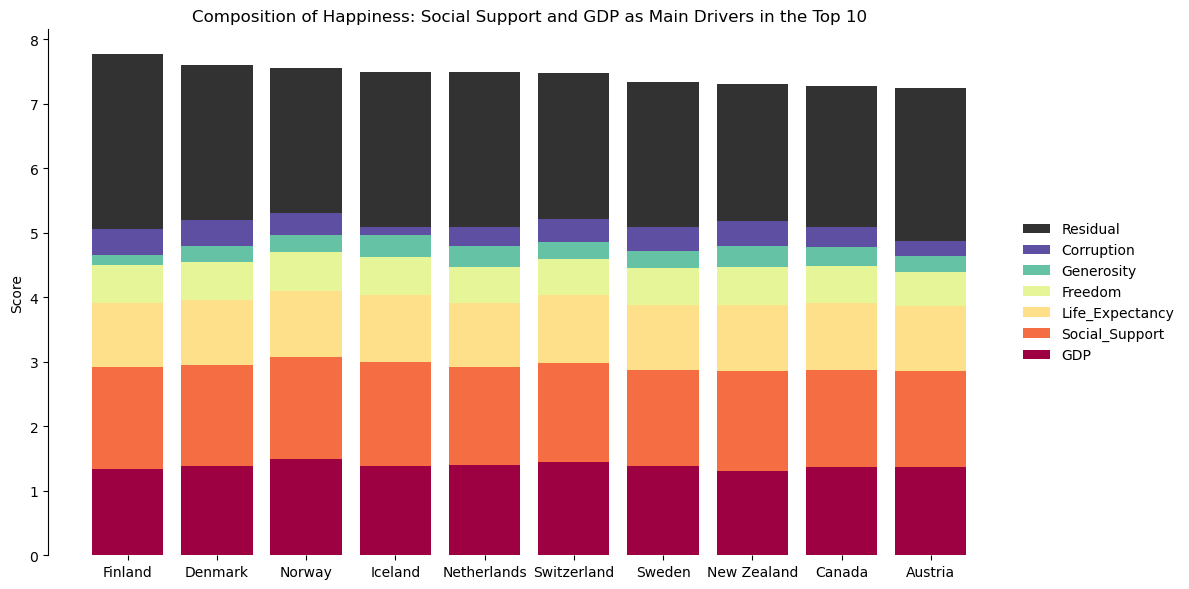

In [218]:
x = top10_df.index
y = ["GDP", "Social_Support", "Life_Expectancy", "Freedom", "Generosity", "Corruption", "Residual"]
cmap = plt.get_cmap("Spectral")

colors = [cmap(i / (len(y)-2)) for i in range(len(y)-1)] 
colors.append("#333232") 



fig, ax = plt.subplots(figsize=(12,6))

bottom = 0

for i in range(len(y)):
    ax.bar(x, top10_df[y[i]], color=colors[i], bottom = bottom, label = y[i], width=0.8)
    bottom += top10_df[y[i]]



handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1],          
    labels[::-1],
    loc="center left",         
    bbox_to_anchor=(1, 0.5),    
    frameon=False
)


ax.set_ylabel("Score")
ax.set_title("Composition of Happiness: Social Support and GDP as Main Drivers in the Top 10")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

fig.tight_layout()


In [219]:
bottom10_df = df.tail(10)
bottom10_df.loc[:,"Sum"] = bottom10_df[["GDP", "Social_Support", "Life_Expectancy", "Freedom", "Generosity", "Corruption"]].sum(axis=1)
bottom10_df.loc[:,"Residual"] = bottom10_df["Score"] - bottom10_df["Sum"]

bottom10_df

C:\Users\devpo\AppData\Local\Temp\ipykernel_29144\2263060704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom10_df.loc[:,"Sum"] = bottom10_df[["GDP", "Social_Support", "Life_Expectancy", "Freedom", "Generosity", "Corruption"]].sum(axis=1)
C:\Users\devpo\AppData\Local\Temp\ipykernel_29144\2263060704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom10_df.loc[:,"Residual"] = bottom10_df["Score"] - bottom10_df["Sum"]


,Rank,Country,Score,GDP,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Sum,Residual
Country,,,,,,,,,,,
Haiti,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,2.015,1.582
Botswana,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100,3.304,0.184
Syria,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141,1.922,1.540
Malawi,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089,1.996,1.414
Yemen,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,2.241,1.139
Rwanda,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2.867,0.467
Tanzania,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2.700,0.531
Afghanistan,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1.411,1.792
Central African Republic,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0.626,2.457


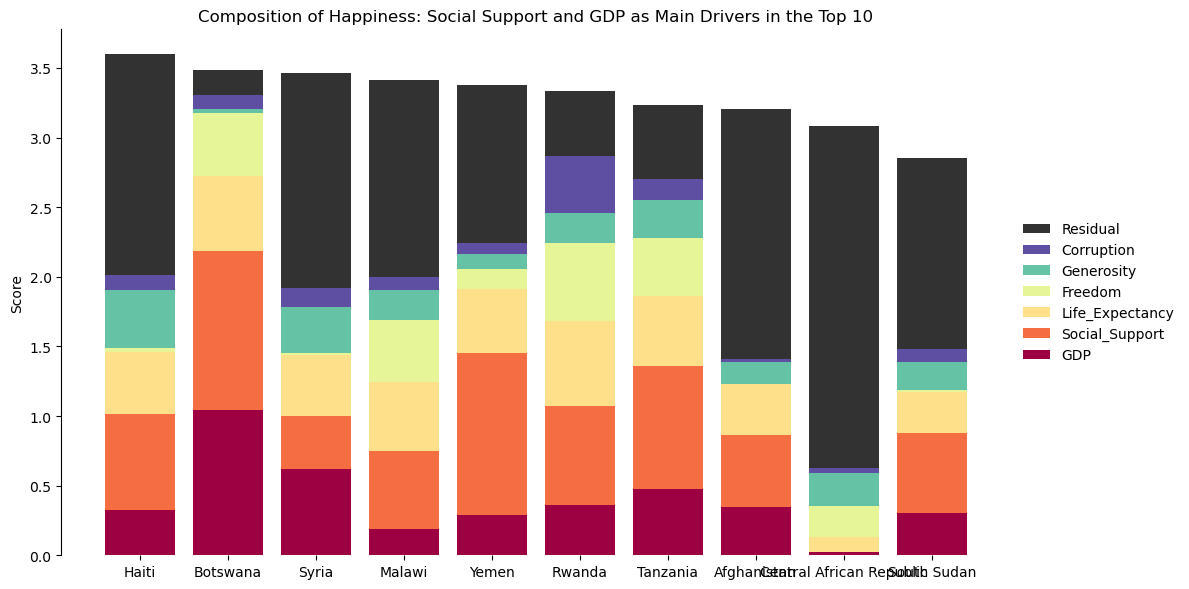

In [220]:
x = bottom10_df.index
y = ["GDP", "Social_Support", "Life_Expectancy", "Freedom", "Generosity", "Corruption", "Residual"]
cmap = plt.get_cmap("Spectral")

colors = [cmap(i / (len(y)-2)) for i in range(len(y)-1)] 
colors.append("#333232") 



fig, ax = plt.subplots(figsize=(12,6))

bottom = 0

for i in range(len(y)):
    ax.bar(x, bottom10_df[y[i]], color=colors[i], bottom = bottom, label = y[i], width=0.8)
    bottom += bottom10_df[y[i]]



handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1],          
    labels[::-1],
    loc="center left",         
    bbox_to_anchor=(1, 0.5),    
    frameon=False
)


ax.set_ylabel("Score")
ax.set_title("Composition of Happiness: Social Support and GDP as Main Drivers in the Top 10")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

fig.tight_layout()


C:\Users\devpo\AppData\Local\Temp\ipykernel_29144\2154928987.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xticks_labels, rotation=45,ha="right")


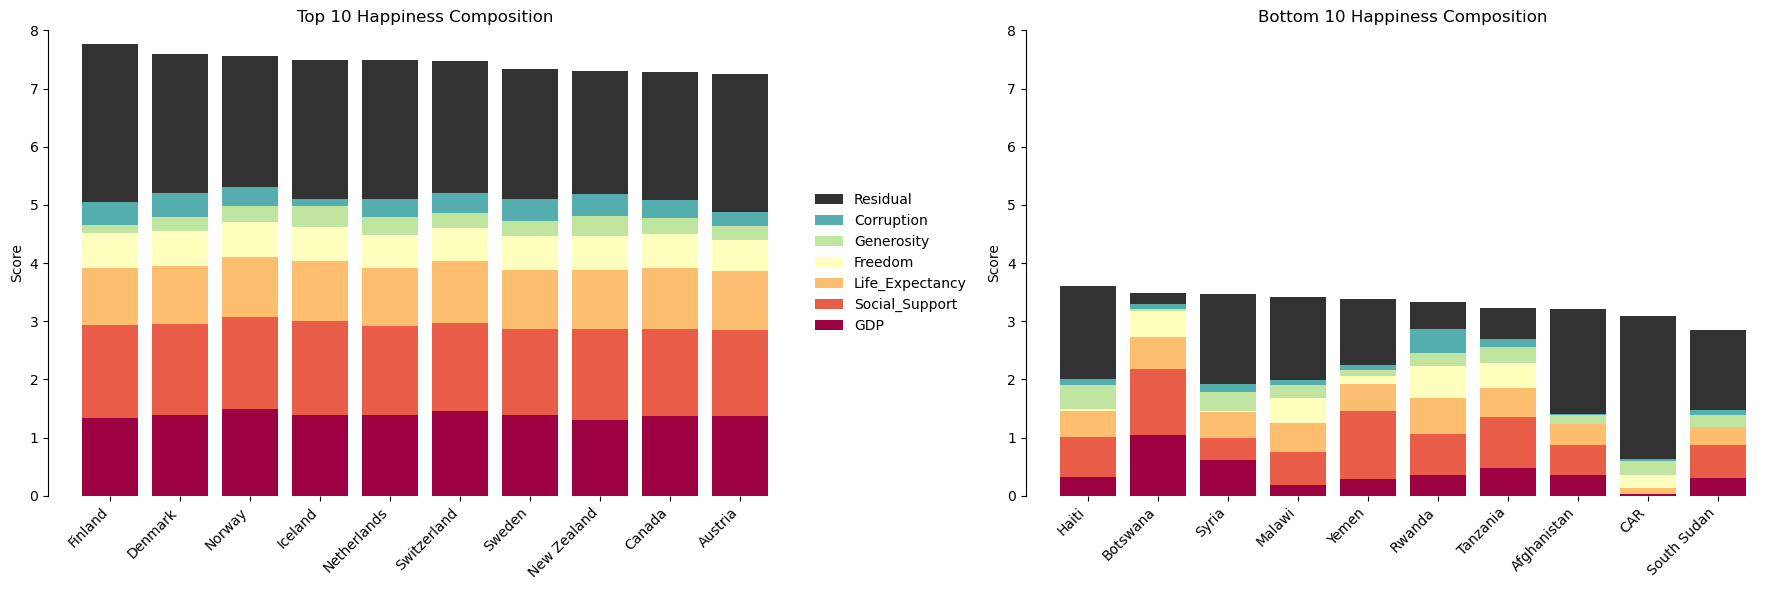

In [ ]:
x = top10_df.index
y = ["GDP", "Social_Support", "Life_Expectancy", "Freedom", "Generosity", "Corruption", "Residual"]
cmap = plt.get_cmap("Spectral")

colors = [cmap(i / (len(y)-1)) for i in range(len(y)-1)]
colors.append("#333232")

fig, axes = plt.subplots(1, 2, figsize=(18,6))
ax1, ax2 = axes

bottom = 0
for i in range(len(y)):
    ax1.bar(x, top10_df[y[i]], color=colors[i], bottom=bottom, label=y[i], width=0.8)
    bottom += top10_df[y[i]]

handles, labels = ax.get_legend_handles_labels()

x = bottom10_df.index
bottom = 0
for i in range(len(y)):
    ax2.bar(x, bottom10_df[y[i]], color=colors[i], bottom = bottom, label = y[i], width=0.8)
    bottom += bottom10_df[y[i]]


for ax in axes: 
    ax.set_ylabel("Score")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_ylim(0,8)



plt.setp(ax1.get_xticklabels(), rotation=45, ha="right") 

xticks_labels = [label if label != "Central African Republic" else "CAR" for label in x]
ax2.set_xticklabels(xticks_labels, rotation=45,ha="right")

ax1.legend(handles[::-1], labels[::-1], loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)

ax1.set_title("Top 10 Happiness Composition")
ax2.set_title("Bottom 10 Happiness Composition")
plt.tight_layout()
plt.show()


In [260]:

df.loc[:,"Sum"] = df[["GDP", "Social_Support", "Life_Expectancy", "Freedom", "Generosity", "Corruption"]].sum(axis=1)
df.loc[:,"Residual"] = df["Score"] - df["Sum"]

,Rank,Country,Score,GDP,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Sum,Residual
Country,,,,,,,,,,,
Finland,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,5.055,2.714
Denmark,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,5.206,2.394
Norway,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,5.313,2.241
Iceland,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,5.093,2.401
Netherlands,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,5.094,2.394
Switzerland,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,5.208,2.272
Sweden,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,5.097,2.246
New Zealand,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,5.181,2.126
Canada,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,5.086,2.192


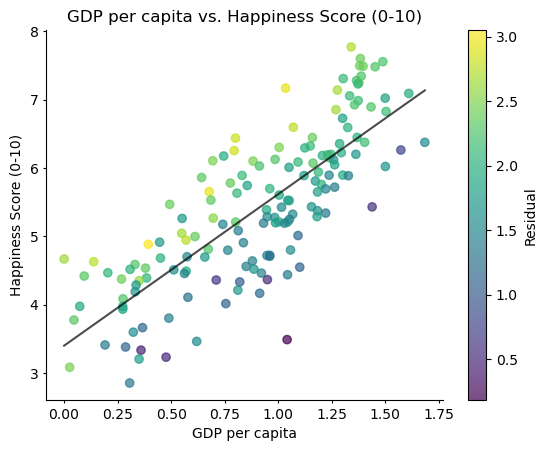

In [283]:
ax = plt.subplot()

x = df["GDP"]
y = df["Score"]

scatter = ax.scatter(x,y, alpha=0.7, c=df["Residual"],cmap="viridis")
plt.colorbar(scatter, ax= ax, orientation='vertical', label="Residual")


ax.set_ylabel("Happiness Score (0-10)")
ax.set_xlabel("GDP per capita")
ax.set_title("GDP per capita vs. Happiness Score (0-10)")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


ax.tick_params(length=2)


m, n = np.polyfit(x,y,1)

x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = m * x_fit + n
ax.plot(x_fit, y_fit, color="black", linewidth=1.5, alpha=0.7)

#for i, country in enumerate(df["Country"]):
#    ax.annotate(country, (x[i], y[i]), fontsize=6, alpha=0.7)

plt.show()

<Axes: >

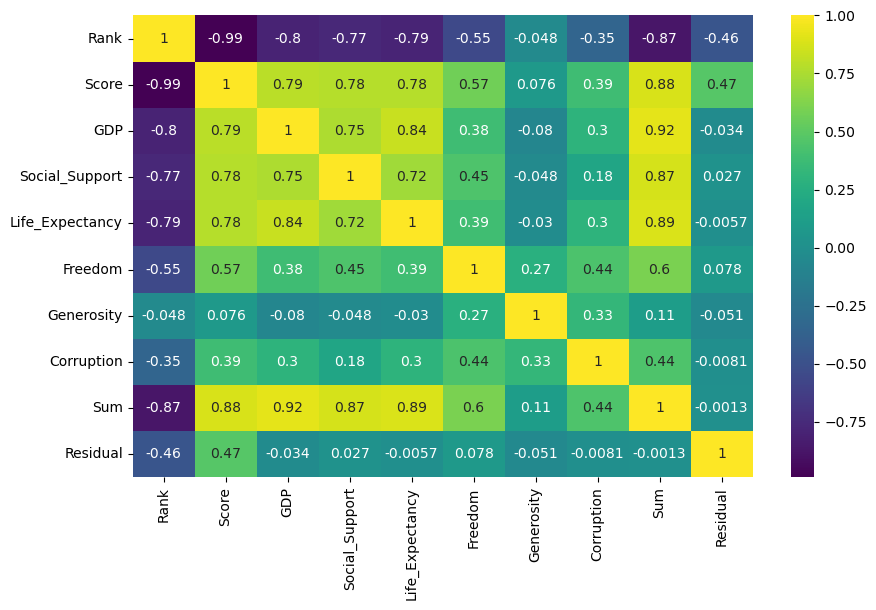

In [282]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.select_dtypes(include="number").corr(), ax=ax, cmap="viridis", annot=True)

In [284]:
df.sort_values("Residual", ascending=False).head(3)[["Score", "Residual"]]

,Score,Residual
Country,,
Benin,4.883,3.050
Costa Rica,7.167,2.934
Pakistan,5.653,2.924
